In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('english_logistic_survey.csv')

In [4]:
df.head()

,Unnamed: 0,1. Gender,2. Age,3. Educational level,4. Your position in the company,5. Years of experience in the Supply Chain industry,6. Number of employees in the company,7. Company turnover,8. Is the company certified according to international quality standards?,9. To what extent are the following elements of the Quality system applied? [The company records the risks of the internal environment],9. To what extent are the following elements of the Quality system applied? [The company records the risks of the external environment],9. To what extent are the following elements of the Quality system applied? [The company follows a proactive management style],9. To what extent are the following elements of the Quality system applied? [Company work instructions apply],9. To what extent are the following elements of the Quality system applied? [The company studies and implements the risk approach],10. To what extent are the following elements of Total Quality Management applied? [Employee Quality Management],10. To what extent are the following elements of Total Quality Management applied? [Employee Quality Management].1,10. To what extent are the following elements of Total Quality Management applied? [Continuous Improvement (DMAIC)],10. To what extent are the following elements of Total Quality Management applied? [Process Quality Management],10. To what extent are the following elements of Total Quality Management applied? [Human resource training],10. To what extent are the following elements of Total Quality Management applied? [Strategic Quality Planning],"11. As for the company's culture, to what extent do the following apply? [Communication is easy]","11. As for the company's culture, to what extent do the following apply? [The company is a family]","11. As for the company's culture, to what extent do the following apply? [Follow the top-down method of communication]","11. As for the company's culture, to what extent do the following apply? [Follow the bottom-up method of communication]","11. As for the company's culture, to what extent do the following apply? [A competitive atmosphere is created]","11. As for the company's culture, to what extent do the following apply? [The company goes through changes through repressive management style]","11. As for the company's culture, to what extent do the following apply? [There is an employee reward system]",12. To what extent are the following goals achieved? [Satisfaction],12. To what extent are the following goals achieved? [Transportation Cost Reduction],12. To what extent are the following goals achieved? [Inventory reduction in warehouses],12. To what extent are the following goals achieved? [Product Demand Forecast],12. To what extent are the following goals achieved? [Simplification and Simplification of Procedures]
0,0,Man,31 - 40,Postgraduate,Demand planner,7 - 15,Over 200 people,"Above € 10,000,000",Yes,Greatly,Greatly,To a moderate degree,Largely,Largely,To a moderate degree,To a moderate degree,Largely,To a moderate degree,In a small scale,Largely,Largely,To a moderate degree,To a moderate degree,To a moderate degree,To a moderate degree,Largely,To a moderate degree,To a moderate degree,To a moderate degree,In a small scale,To a moderate degree,To a moderate degree
1,1,Woman,31 - 40,Postgraduate,NaN,7 - 15,51 - 100 people,"1,500,000 - € 10,000,000",No,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,In a small scale,In a small scale,In a small scale,In a small scale,Not at all,Not at all,Largely,In a small scale,To a moderate degree,In a small scale,Not at all,Not at all,Not at all,Not at all
2,2,Man,31 - 40,Postgraduate,Logistics manager,3 - 7,15 - 50 άτομα,"Above € 10,000,000",Yes,In a small scale,To a moderate degree,In a small scale,In a small scale,Not at all,In a small scale,In a small scale,In a small scale,In a small scale,Not at all,In a small scale,In a small scale,In a small scale,Not at all,In a small scale

## Process dataframe

In [5]:
df_2 = df.copy()

In [6]:
df_2 = df_2.iloc[:,1:]
df_2.head()

,1. Gender,2. Age,3. Educational level,4. Your position in the company,5. Years of experience in the Supply Chain industry,6. Number of employees in the company,7. Company turnover,8. Is the company certified according to international quality standards?,9. To what extent are the following elements of the Quality system applied? [The company records the risks of the internal environment],9. To what extent are the following elements of the Quality system applied? [The company records the risks of the external environment],9. To what extent are the following elements of the Quality system applied? [The company follows a proactive management style],9. To what extent are the following elements of the Quality system applied? [Company work instructions apply],9. To what extent are the following elements of the Quality system applied? [The company studies and implements the risk approach],10. To what extent are the following elements of Total Quality Management applied? [Employee Quality Management],10. To what extent are the following elements of Total Quality Management applied? [Employee Quality Management].1,10. To what extent are the following elements of Total Quality Management applied? [Continuous Improvement (DMAIC)],10. To what extent are the following elements of Total Quality Management applied? [Process Quality Management],10. To what extent are the following elements of Total Quality Management applied? [Human resource training],10. To what extent are the following elements of Total Quality Management applied? [Strategic Quality Planning],"11. As for the company's culture, to what extent do the following apply? [Communication is easy]","11. As for the company's culture, to what extent do the following apply? [The company is a family]","11. As for the company's culture, to what extent do the following apply? [Follow the top-down method of communication]","11. As for the company's culture, to what extent do the following apply? [Follow the bottom-up method of communication]","11. As for the company's culture, to what extent do the following apply? [A competitive atmosphere is created]","11. As for the company's culture, to what extent do the following apply? [The company goes through changes through repressive management style]","11. As for the company's culture, to what extent do the following apply? [There is an employee reward system]",12. To what extent are the following goals achieved? [Satisfaction],12. To what extent are the following goals achieved? [Transportation Cost Reduction],12. To what extent are the following goals achieved? [Inventory reduction in warehouses],12. To what extent are the following goals achieved? [Product Demand Forecast],12. To what extent are the following goals achieved? [Simplification and Simplification of Procedures]
0,Man,31 - 40,Postgraduate,Demand planner,7 - 15,Over 200 people,"Above € 10,000,000",Yes,Greatly,Greatly,To a moderate degree,Largely,Largely,To a moderate degree,To a moderate degree,Largely,To a moderate degree,In a small scale,Largely,Largely,To a moderate degree,To a moderate degree,To a moderate degree,To a moderate degree,Largely,To a moderate degree,To a moderate degree,To a moderate degree,In a small scale,To a moderate degree,To a moderate degree
1,Woman,31 - 40,Postgraduate,NaN,7 - 15,51 - 100 people,"1,500,000 - € 10,000,000",No,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,In a small scale,In a small scale,In a small scale,In a small scale,Not at all,Not at all,Largely,In a small scale,To a moderate degree,In a small scale,Not at all,Not at all,Not at all,Not at all
2,Man,31 - 40,Postgraduate,Logistics manager,3 - 7,15 - 50 άτομα,"Above € 10,000,000",Yes,In a small scale,To a moderate degree,In a small scale,In a small scale,Not at all,In a small scale,In a small scale,In a small scale,In a small scale,Not at all,In a small scale,In a small scale,In a small scale,Not at all,In a small scale,Not at all,Not a

In [7]:
df_2["4. Your position in the company"] = df_2["4. Your position in the company"].str.contains('anager', regex=True, na=False)

In [8]:
df_2["4. Your position in the company"] = df_2["4. Your position in the company"].astype(int)
df_2["4. Your position in the company"]

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     0
9     1
10    0
11    0
12    1
13    1
14    1
15    0
16    1
17    0
18    0
19    0
20    0
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    1
30    1
31    1
32    1
33    0
34    1
35    1
36    0
37    1
38    1
39    0
Name: 4. Your position in the company, dtype: int32

In [9]:
df_processed = df_2.copy()
df_processed = df_processed.replace({'Not at all': 0, 'In a small scale': 1, 'To a moderate degree': 2, 'Largely': 3, 
                                     'Greatly': 4,'Yes': 1, 'No': 0, 'Woman': 1, 'Man': 0})
df_processed

,1. Gender,2. Age,3. Educational level,4. Your position in the company,5. Years of experience in the Supply Chain industry,6. Number of employees in the company,7. Company turnover,8. Is the company certified according to international quality standards?,9. To what extent are the following elements of the Quality system applied? [The company records the risks of the internal environment],9. To what extent are the following elements of the Quality system applied? [The company records the risks of the external environment],9. To what extent are the following elements of the Quality system applied? [The company follows a proactive management style],9. To what extent are the following elements of the Quality system applied? [Company work instructions apply],9. To what extent are the following elements of the Quality system applied? [The company studies and implements the risk approach],10. To what extent are the following elements of Total Quality Management applied? [Employee Quality Management],10. To what extent are the following elements of Total Quality Management applied? [Employee Quality Management].1,10. To what extent are the following elements of Total Quality Management applied? [Continuous Improvement (DMAIC)],10. To what extent are the following elements of Total Quality Management applied? [Process Quality Management],10. To what extent are the following elements of Total Quality Management applied? [Human resource training],10. To what extent are the following elements of Total Quality Management applied? [Strategic Quality Planning],"11. As for the company's culture, to what extent do the following apply? [Communication is easy]","11. As for the company's culture, to what extent do the following apply? [The company is a family]","11. As for the company's culture, to what extent do the following apply? [Follow the top-down method of communication]","11. As for the company's culture, to what extent do the following apply? [Follow the bottom-up method of communication]","11. As for the company's culture, to what extent do the following apply? [A competitive atmosphere is created]","11. As for the company's culture, to what extent do the following apply? [The company goes through changes through repressive management style]","11. As for the company's culture, to what extent do the following apply? [There is an employee reward system]",12. To what extent are the following goals achieved? [Satisfaction],12. To what extent are the following goals achieved? [Transportation Cost Reduction],12. To what extent are the following goals achieved? [Inventory reduction in warehouses],12. To what extent are the following goals achieved? [Product Demand Forecast],12. To what extent are the following goals achieved? [Simplification and Simplification of Procedures]
0,0,31 - 40,Postgraduate,0,7 - 15,Over 200 people,"Above € 10,000,000",1,4,4,2,3,3,2,2,3,2,1,3,3,2,2,2,2,3,2,2,2,1,2,2
1,1,31 - 40,Postgraduate,0,7 - 15,51 - 100 people,"1,500,000 - € 10,000,000",0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,3,1,2,1,0,0,0,0
2,0,31 - 40,Postgraduate,1,3 - 7,15 - 50 άτομα,"Above € 10,000,000",1,1,2,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,0,2,3,4,3,3
3,0,31 - 40,Undergraduate,1,7 - 15,15 - 50 άτομα,"Above € 10,000,000",1,3,3,3,3,3,2,2,2,2,2,1,3,3,3,3,2,2,3,3,2,4,3,3
4,0,41 - 50,Undergraduate,1,Over 20 years,51 - 100 people,"Above € 10,000,000",1,3,3,3,3,3,3,3,2,4,2,3,4,4,3,3,1,1,3,3,2,2,2,2
5,1,18 - 30,Postgraduate,0,3 - 7,Over 200 people,"1,500,000 - € 10,000,000",1,3,4,2,3,3,4,4,3,4,3,4,4,3,2,2,2,2,4,3,3,3,3,3
6,0,31 - 40,Postgraduate,1,3 - 7,Over 200 people,"Above € 10,000,000",1,3,2,2,4,3,3,3,3,3,3,3,3,2,3,3,2,2,3,3,4,4,4,3
7,0,31 - 40,Postgraduate,0,7 - 15,Up to 15 people,"€ 500,000 - € 1,500,000",1,3,3,1,2,3,3,2,1,2,1,1,1,4,2,2,2,2,1,2,2,1,2,2
8,0,31 - 40,Postgraduate,0,3 - 7,51 - 100 people,"1,500,000 - € 10,000,000",1,2,2,3,4,2,3,3,2,2,2,2,3,3,3,2,1,2,3,3,2,2,1,2
9,1,41 - 50,Postgraduate,1,7 - 15,Over 200 people,"Above € 10,000,000",1,4,4,4,4,4,4,4,4,4,4,4,

In [10]:
TQM_Score = df_processed.iloc[:,8:].sum(axis=1)
TQM_Score 

0     54
1     11
2     28
3     60
4     62
5     71
6     68
7     45
8     54
9     72
10    70
11    72
12    77
13    53
14    73
15    51
16    47
17    69
18    82
19    44
20    80
21    64
22    80
23    69
24    81
25    52
26    63
27    71
28    66
29    74
30    17
31    64
32    77
33    64
34    44
35    33
36    72
37    37
38    39
39    76
dtype: int64

In [11]:
#Age, Educational level, Years of experience...,Number of Employes, Company turnover
Age = pd.get_dummies(df_processed["2. Age"])
Education_level = pd.get_dummies(df_processed["3. Educational level"])
Years_of_experience = pd.get_dummies(df_processed["5. Years of experience in the Supply Chain industry"])
Number_of_employes = pd.get_dummies(df_processed["6. Number of employees in the company"])
Company_turnover = pd.get_dummies(df_processed["7. Company turnover"])

df_final = pd.concat([df_processed["1. Gender"], Age, Education_level, Years_of_experience, 
                      Number_of_employes, Company_turnover], axis=1)

df_final["Manager or Not"] = df_processed["4. Your position in the company"]
                      
df_final["international quality standards"] = df_processed.iloc[:,[7]]

df_final["TQM_Score"] = TQM_Score 

df_final.head()

,1. Gender,18 - 30,31 - 40,41 - 50,51 - 60,College,High School,Postgraduate,Undergraduate,16 - 20,3 - 7,7 - 15,Over 20 years,Up to 3 years,101 - 200 people,15 - 50 άτομα,51 - 100 people,Over 200 people,Up to 15 people,"1,500,000 - € 10,000,000","Above € 10,000,000","Up to € 500,000","€ 500,000 - € 1,500,000",Manager or Not,international quality standards,TQM_Score
0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,54
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,11
2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,28
3,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,60
4,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,62


## Cronbach's alpha reliability coefficient

In [12]:
print("TQM_Score: ci=95%")
pg.cronbach_alpha(data=df_processed.iloc[:, 8:])

TQM_Score: ci=95%


(0.9572823854899489, array([0.936, 0.974]))

## Finding Correlations

In [13]:
correlation_table = df_final.corr(method='pearson')
correlation_table

,1. Gender,18 - 30,31 - 40,41 - 50,51 - 60,College,High School,Postgraduate,Undergraduate,16 - 20,3 - 7,7 - 15,Over 20 years,Up to 3 years,101 - 200 people,15 - 50 άτομα,51 - 100 people,Over 200 people,Up to 15 people,"1,500,000 - € 10,000,000","Above € 10,000,000","Up to € 500,000","€ 500,000 - € 1,500,000",Manager or Not,international quality standards,TQM_Score
1. Gender,1.000000,4.551496e-01,-0.442194,2.022887e-01,-0.197235,1.338014e-01,-0.137666,-0.051288,0.003327,-0.052801,0.209679,-0.329923,0.063734,0.266847,-0.118002,-0.219527,-1.911448e-02,0.329923,-0.197235,0.003327,0.011036,-0.137666,0.050572,-0.167729,1.911448e-02,0.150675
18 - 30,0.455150,1.000000e+00,-0.552771,-2.500000e-01,-0.114708,2.622655e-17,-0.080064,-0.053376,0.098693,-0.142374,0.354604,-0.303433,-0.210042,0.458831,-0.166667,-0.210042,-4.589647e-17,0.303433,-0.114708,-0.065795,-0.081832,-0.080064,0.250000,-0.201008,1.889822e-01,0.264533
31 - 40,-0.442194,-5.527708e-01,1.000000,-5.527708e-01,-0.253629,-1.139606e-01,0.144841,0.230673,-0.244669,-0.124012,0.043863,0.472691,-0.464420,-0.253629,0.134005,-0.042220,-1.139606e-01,-0.066075,0.207514,0.019838,0.065795,0.144841,-0.201008,-0.191919,1.139606e-01,-0.124791
41 - 50,0.202289,-2.500000e-01,-0.552771,1.000000e+00,-0.114708,1.889822e-01,-0.080064,-0.186816,0.098693,0.332205,-0.327327,-0.177003,0.490098,-0.114708,0.041667,0.140028,-3.933983e-18,-0.075858,-0.114708,-0.065795,0.190941,-0.080064,-0.166667,0.301511,1.835859e-17,0.124739
51 - 60,-0.197235,-1.147079e-01,-0.253629,-1.147079e-01,1.000000,-8.671100e-02,-0.036736,-0.085717,0.196228,-0.065326,-0.150188,-0.197235,0.546119,-0.052632,-0.076472,0.224872,2.601330e-01,-0.266847,-0.052632,0.196228,-0.350438,-0.036736,0.305888,0.253629,-6.069770e-01,-0.429586
College,0.133801,2.622655e-17,-0.113961,1.889822e-01,-0.086711,1.000000e+00,-0.060523,-0.544705,-0.174078,-0.107624,-0.247436,0.133801,0.264628,-0.086711,-0.125988,0.264628,-1.428571e-01,0.019114,-0.086711,0.223814,-0.082479,-0.060523,-0.125988,0.113961,1.428571e-01,0.181001
High School,-0.137666,-8.006408e-02,0.144841,-8.006408e-02,-0.036736,-6.052275e-02,1.000000,-0.230769,-0.073750,0.562352,-0.104828,-0.137666,-0.067267,-0.036736,-0.053376,-0.067267,-6.052275e-02,0.137666,-0.036736,-0.073750,0.104828,-0.025641,-0.053376,-0.144841,6.052275e-02,-0.143723
Postgraduate,-0.051288,-5.337605e-02,0.230673,-1.868162e-01,-0.085717,-5.447048e-01,-0.230769,1.000000,-0.663747,-0.005066,0.221305,0.164660,-0.455923,-0.085717,0.231296,-0.306440,1.008713e-01,-0.056686,0.159189,-0.101845,0.011648,0.111111,0.053376,-0.230673,6.052275e-02,0.010561
Undergraduate,0.003327,9.869275e-02,-0.244669,9.869275e-02,0.196228,-1.740777e-01,-0.073750,-0.663747,1.000000,-0.131145,-0.014358,-0.262865,0.359313,0.196228,-0.153522,0.175050,2.486824e-02,-0.003327,-0.105661,-0.038961,0.014358,-0.073750,0.065795,0.244669,-2.238141e-01,-0.111505
16 - 20,-0.052801,-1.423737e-01,-0.124012,3.322053e-01,-0.065326,-1.076244e-01,0.562352,-0.005066,-0.131145,1.000000,-0.186411,-0.244805,-0.119618,-0.065326,-0.094916,0.146200,-1.076244e-01,0.052801,-0.065326,-0.131145,0.186411,-0.045596,-0.094916,-0.257564,1.076244e-01,-0.026946


## Function to calculate p-value from pearson correlation table

In [14]:
def calculate_pvalues(df):
    from scipy.stats import pearsonr
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

In [15]:
pvalues = calculate_pvalues(df_final)
pvalues

,1. Gender,18 - 30,31 - 40,41 - 50,51 - 60,College,High School,Postgraduate,Undergraduate,16 - 20,3 - 7,7 - 15,Over 20 years,Up to 3 years,101 - 200 people,15 - 50 άτομα,51 - 100 people,Over 200 people,Up to 15 people,"1,500,000 - € 10,000,000","Above € 10,000,000","Up to € 500,000","€ 500,000 - € 1,500,000",Manager or Not,international quality standards,TQM_Score
1. Gender,0.0,0.0032,0.0043,0.2106,0.2225,0.4104,0.3969,0.7533,0.9837,0.7463,0.1941,0.0376,0.696,0.096,0.4683,0.1735,0.9068,0.0376,0.2225,0.9837,0.9461,0.3969,0.7566,0.3009,0.9068,0.3534
18 - 30,0.0032,0.0,0.0002,0.1198,0.4809,1.0,0.6234,0.7436,0.5446,0.3808,0.0248,0.057,0.1933,0.0029,0.304,0.1933,1.0,0.057,0.4809,0.6867,0.6157,0.6234,0.1198,0.2136,0.2429,0.099
31 - 40,0.0043,0.0002,0.0,0.0002,0.1143,0.4838,0.3725,0.1521,0.1281,0.4458,0.7881,0.0021,0.0025,0.1143,0.4097,0.7959,0.4838,0.6854,0.1988,0.9033,0.6867,0.3725,0.2136,0.2355,0.4838,0.4429
41 - 50,0.2106,0.1198,0.0002,0.0,0.4809,0.2429,0.6234,0.2484,0.5446,0.0362,0.0392,0.2746,0.0013,0.4809,0.7985,0.3888,1.0,0.6418,0.4809,0.6867,0.2379,0.6234,0.304,0.0587,1.0,0.4431
51 - 60,0.2225,0.4809,0.1143,0.4809,0.0,0.5947,0.8219,0.599,0.2249,0.6888,0.355,0.2225,0.0003,0.747,0.6391,0.163,0.105,0.096,0.747,0.2249,0.0266,0.8219,0.0549,0.1143,0.0,0.0057
College,0.4104,1.0,0.4838,0.2429,0.5947,0.0,0.7107,0.0003,0.2827,0.5086,0.1237,0.4104,0.0989,0.5947,0.4385,0.0989,0.3792,0.9068,0.5947,0.165,0.6129,0.7107,0.4385,0.4838,0.3792,0.2637
High School,0.3969,0.6234,0.3725,0.6234,0.8219,0.7107,0.0,0.152,0.6511,0.0002,0.5197,0.3969,0.68,0.8219,0.7436,0.68,0.7107,0.3969,0.8219,0.6511,0.5197,0.8752,0.7436,0.3725,0.7107,0.3763
Postgraduate,0.7533,0.7436,0.1521,0.2484,0.599,0.0003,0.152,0.0,0.0,0.9752,0.17,0.3099,0.0031,0.599,0.151,0.0545,0.5357,0.7283,0.3265,0.5318,0.9431,0.4949,0.7436,0.1521,0.7107,0.9484
Undergraduate,0.9837,0.5446,0.1281,0.5446,0.2249,0.2827,0.6511,0.0,0.0,0.4199,0.9299,0.1013,0.0228,0.2249,0.3443,0.28,0.8789,0.9837,0.5164,0.8113,0.9299,0.6511,0.6867,0.1281,0.165,0.4933
16 - 20,0.7463,0.3808,0.4458,0.0362,0.6888,0.5086,0.0002,0.9752,0.4199,0.0,0.2494,0.1279,0.4622,0.6888,0.5602,0.368,0.5086,0.7463,0.6888,0.4199,0.2494,0.78,0.5602,0.1086,0.5086,0.8689


## Function that filters values in dataframe based on condition

In [16]:
def value_to_NaN(df, value, op):
    filtered_values = df
    if op == ">":
        for col in filtered_values.columns:
            filtered_values.loc[filtered_values[col].astype(float) > value, col] = "NaN"
    elif op == "=":
        for col in filtered_values.columns:
            filtered_values.loc[filtered_values[col].astype(float) == value, col] = "NaN"
    elif op == "<":
        for col in filtered_values.columns:
            filtered_values.loc[filtered_values[col].astype(float) < value, col] = "NaN"
    else:
        filtered_values = "opperation is not supported"
    return filtered_values

## Checking correlations statistical importance using p-value

In [17]:
important_pvalues = value_to_NaN(pvalues, 0.05, ">")
important_pvalues

,1. Gender,18 - 30,31 - 40,41 - 50,51 - 60,College,High School,Postgraduate,Undergraduate,16 - 20,3 - 7,7 - 15,Over 20 years,Up to 3 years,101 - 200 people,15 - 50 άτομα,51 - 100 people,Over 200 people,Up to 15 people,"1,500,000 - € 10,000,000","Above € 10,000,000","Up to € 500,000","€ 500,000 - € 1,500,000",Manager or Not,international quality standards,TQM_Score
1. Gender,0.0,0.0032,0.0043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0376,NaN,NaN,NaN,NaN,NaN,0.0376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18 - 30,0.0032,0.0,0.0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0248,NaN,NaN,0.0029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31 - 40,0.0043,0.0002,0.0,0.0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0021,0.0025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41 - 50,NaN,NaN,0.0002,0.0,NaN,NaN,NaN,NaN,NaN,0.0362,0.0392,NaN,0.0013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51 - 60,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0266,NaN,NaN,NaN,0.0,0.0057
College,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High School,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postgraduate,NaN,NaN,NaN,NaN,NaN,0.0003,NaN,0.0,0.0,NaN,NaN,NaN,0.0031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Undergraduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 - 20,NaN,NaN,NaN,0.0362,NaN,NaN,0.0002,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Displaying the important correlations

In [18]:
important_correlation_table = correlation_table

for col in correlation_table.columns:
    for index in correlation_table.index:
        if important_pvalues.loc[col, index] == "NaN":
            important_correlation_table.loc[col, index] = "NaN"

important_correlation_table

,1. Gender,18 - 30,31 - 40,41 - 50,51 - 60,College,High School,Postgraduate,Undergraduate,16 - 20,3 - 7,7 - 15,Over 20 years,Up to 3 years,101 - 200 people,15 - 50 άτομα,51 - 100 people,Over 200 people,Up to 15 people,"1,500,000 - € 10,000,000","Above € 10,000,000","Up to € 500,000","€ 500,000 - € 1,500,000",Manager or Not,international quality standards,TQM_Score
1. Gender,1.0,0.45515,-0.442194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.329923,NaN,NaN,NaN,NaN,NaN,0.329923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18 - 30,0.45515,1.0,-0.552771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.354604,NaN,NaN,0.458831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31 - 40,-0.442194,-0.552771,1.0,-0.552771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.472691,-0.46442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41 - 50,NaN,NaN,-0.552771,1.0,NaN,NaN,NaN,NaN,NaN,0.332205,-0.327327,NaN,0.490098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51 - 60,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.546119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.350438,NaN,NaN,NaN,-0.606977,-0.429586
College,NaN,NaN,NaN,NaN,NaN,1.0,NaN,-0.544705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High School,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.562352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postgraduate,NaN,NaN,NaN,NaN,NaN,-0.544705,NaN,1.0,-0.663747,NaN,NaN,NaN,-0.455923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Undergraduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.663747,1.0,NaN,NaN,NaN,0.359313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 - 20,NaN,NaN,NaN,0.332205,NaN,NaN,0.562352,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating Heatmap

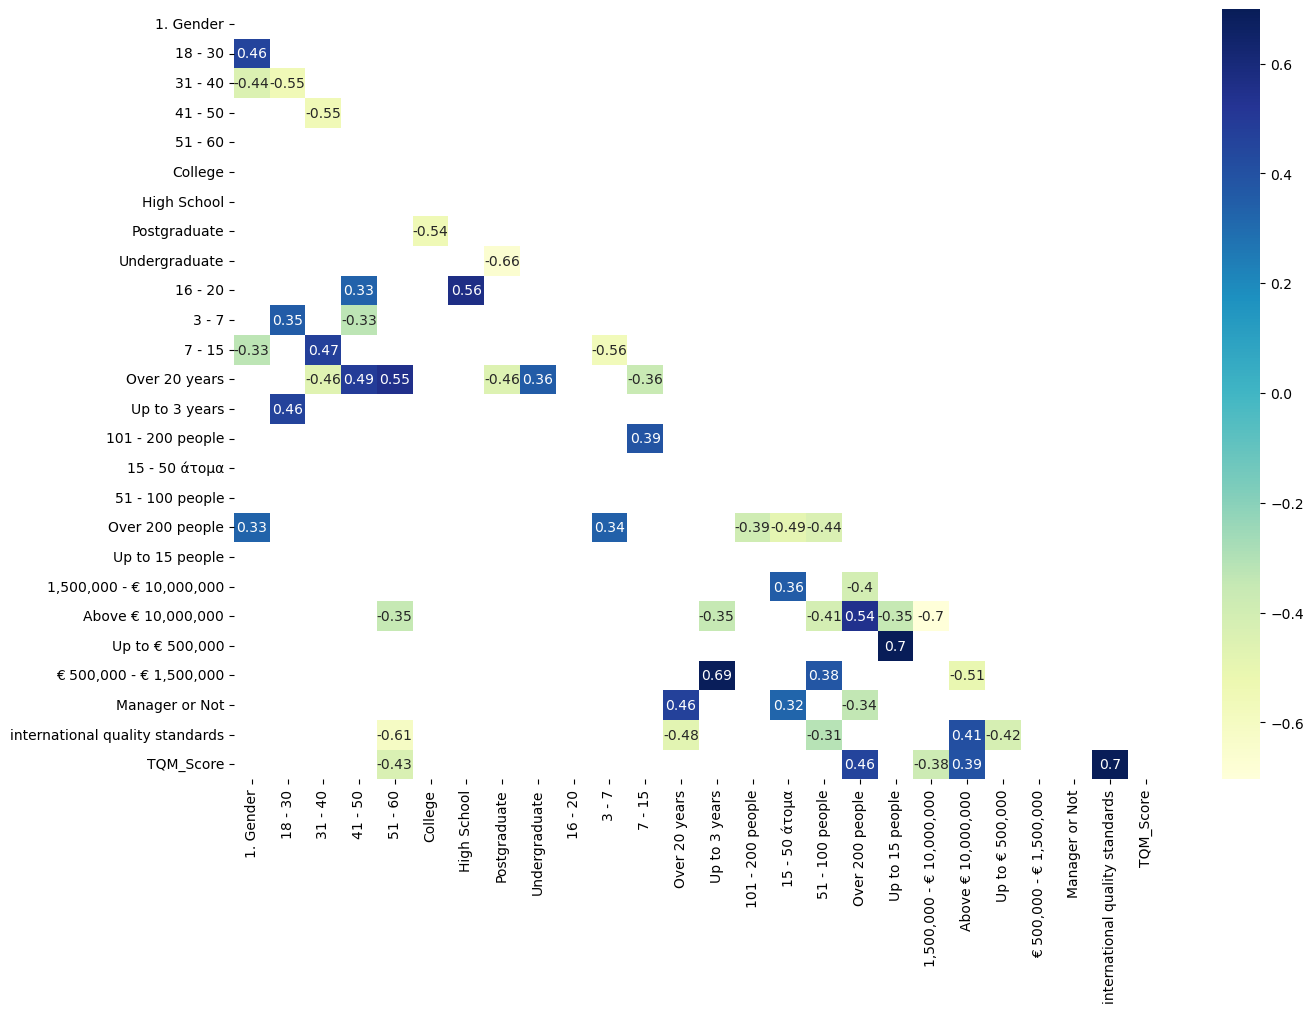

In [19]:
plt.figure(figsize=(15, 10))

important_correlation_table = important_correlation_table.astype(float)

mask = np.triu(np.ones_like(important_correlation_table))

dataplot = sns.heatmap(important_correlation_table, cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

-We see that the correlations hold some value, for example, people who have up to 3 years experience
seem to be younger in age (18-30), and people who are 51-60 years old seem to have over 20 years of 
experience. We also see that managers have more than 20 years of working experience.

-For our TQM score, we see a high correlation with international quality standards. It also seems that
people of older age (51-60) dont seem to use or have TQM. It also seems based on the correlation table
that Big companies, with over 200 people and with a revenue of over 10.000.000€

-But we should also check our sample and count the number of observations

In [20]:
df_final["51 - 60"].sum()

2

In [21]:
df_final["Over 20 years"].sum()

6

In [22]:
df_final["Above € 10,000,000"].sum()

28

In [23]:
df_final["international quality standards"].sum()

35

So the hypothesis of having a correlation between TQM and (international standards, revenue Above € 10,000,000) seems to be the strongest

## Confidence Interval for Correlation

### - Step 1: Create functions

In [24]:
def se_z(df, alpha=0.05):
    se = 1/np.sqrt(len(df.index)-3)
    z = stats.norm.ppf(1-alpha/2)
    return se, z

def conf_inter(r, se, z):
    r_z = np.arctanh(r) 
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    lo = round(lo, 4)
    hi = round(hi, 4)
    lo_and_hi = "({in1}, {in2})".format(in1=str(lo), in2=str(hi))
    return lo_and_hi

def ci_df(df, se, z):
    se = se
    z = z
    ci = df.copy()
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            ci_value = conf_inter(tmp[r][c], se, z)
            ci[r][c] = ci_value
    return ci 

### - Step 2: Create new DataFrame

We will find the confidence interval of correlation for only the TQM table since it's the center of our study

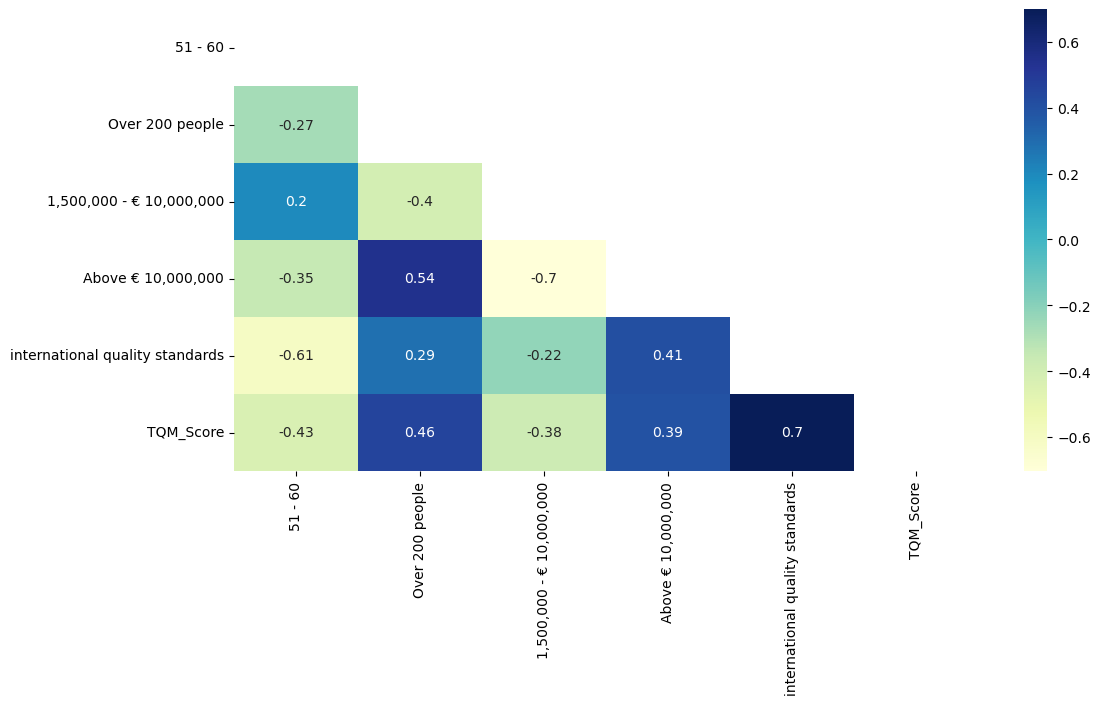

In [25]:
plt.figure(figsize=(12, 6))

TQM_df = df_final.iloc[:,[4,17,19,20,24,-1]]

mask = np.triu(np.ones_like(TQM_df.corr()))

dataplot = sns.heatmap(TQM_df.corr(), cmap="YlGnBu", annot=True, mask=mask)

plt.show()

### - Step 3: Pass desired values

In [26]:
se, z = se_z(TQM_df, 0.05)

corr_ci_df = ci_df(TQM_df.corr(), se, z)

corr_ci_df.iloc[:,-1].to_frame()

C:\Users\gpari\AppData\Local\Temp\ipykernel_8364\3057536951.py:7: RuntimeWarning: divide by zero encountered in arctanh
  r_z = np.arctanh(r)
C:\Users\gpari\AppData\Local\Temp\ipykernel_8364\3057536951.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci[r][c] = ci_value


,TQM_Score
51 - 60,"(-0.6536, -0.1363)"
Over 200 people,"(0.1678, 0.6717)"
"1,500,000 - € 10,000,000","(-0.6152, -0.0726)"
"Above € 10,000,000","(0.0936, 0.6281)"
international quality standards,"(0.4955, 0.8299)"
TQM_Score,"(1.0, 1.0)"


### Function that groups columns in new dataframe based on condition and returns the new dataframe plus the number of columns added

In [27]:
def survey_grouping(df,col_arg):
    new_df = pd.DataFrame()
    k = 0
    for i in df.columns:
        if col_arg in i:
            new_df[i] = df[i]
            k+=1
    return new_df, k

In [28]:
Quality_system, k1 = survey_grouping(df_processed, "9.")
Quality_system_Score = Quality_system.sum(axis=1)

In [29]:
Applied_TQM, k2 = survey_grouping(df_processed, "10.")
Applied_TQM_Score = Applied_TQM.sum(axis=1)

In [30]:
Company_culture, k3 = survey_grouping(df_processed, "11.")
Company_culture_Score = Company_culture.sum(axis=1)

In [31]:
Goals_achieved, k4 = survey_grouping(df_processed, "12.")
Goals_achieved_Score = Goals_achieved.sum(axis=1)

## Vizualizing survey answers

<AxesSubplot:>

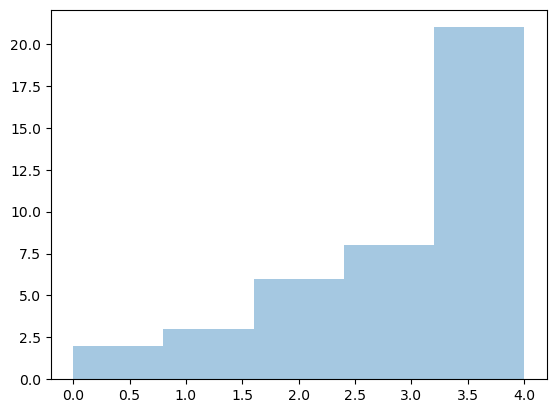

In [38]:
sns.distplot( a=Quality_system_Score/k1, hist=True, kde=False, rug=False )

<AxesSubplot:>

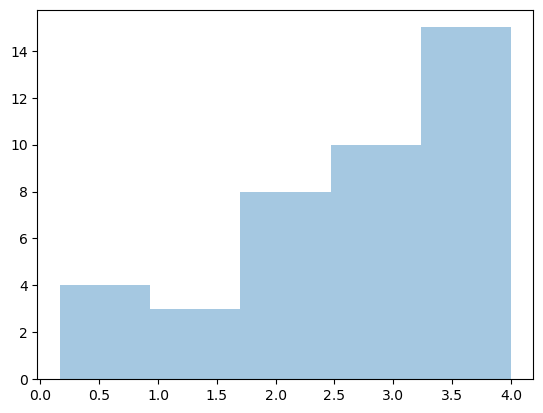

In [44]:
sns.distplot( a=Applied_TQM_Score/k2, hist=True, kde=False, rug=False )

<AxesSubplot:>

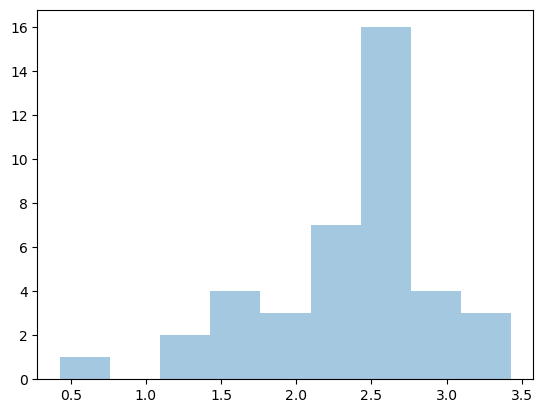

In [43]:
sns.distplot( a=Company_culture_Score/k3, hist=True, kde=False, rug=False )

<AxesSubplot:>

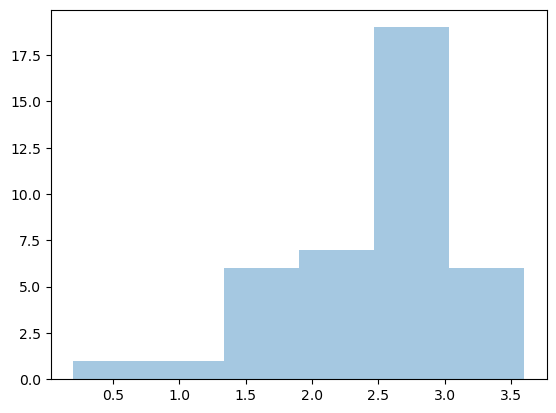

In [42]:
sns.distplot( a=Goals_achieved_Score/k4, hist=True, kde=False, rug=False )

### Function that adds columns in dataframe (dataframe, column_values, desired_column_name) and returns dataframe 

In [32]:
base_df = df_final.iloc[:,:-1]

def add_col(df, columns, col_names):
    i = 0
    for col in columns:
        df[col_names[i]] = col
        i+=1
    return df

columns = [Quality_system_Score, Applied_TQM_Score, Company_culture_Score, Goals_achieved_Score]

col_names = ["Quality_system_Score", "Applied_TQM_Score", 
             "Company_culture_Score", "Goals_achieved_Score"]

post_df = add_col(base_df, columns, col_names)

post_df.head()

,1. Gender,18 - 30,31 - 40,41 - 50,51 - 60,College,High School,Postgraduate,Undergraduate,16 - 20,3 - 7,7 - 15,Over 20 years,Up to 3 years,101 - 200 people,15 - 50 άτομα,51 - 100 people,Over 200 people,Up to 15 people,"1,500,000 - € 10,000,000","Above € 10,000,000","Up to € 500,000","€ 500,000 - € 1,500,000",Manager or Not,international quality standards,Quality_system_Score,Applied_TQM_Score,Company_culture_Score,Goals_achieved_Score
0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,16,13,16,9
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,8,1
2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,5,5,3,15
3,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,15,11,19,15
4,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,15,17,19,11


## Correlation table, Heatmap and p-values for other dataframe

In [33]:
pvalues_2 = calculate_pvalues(post_df)

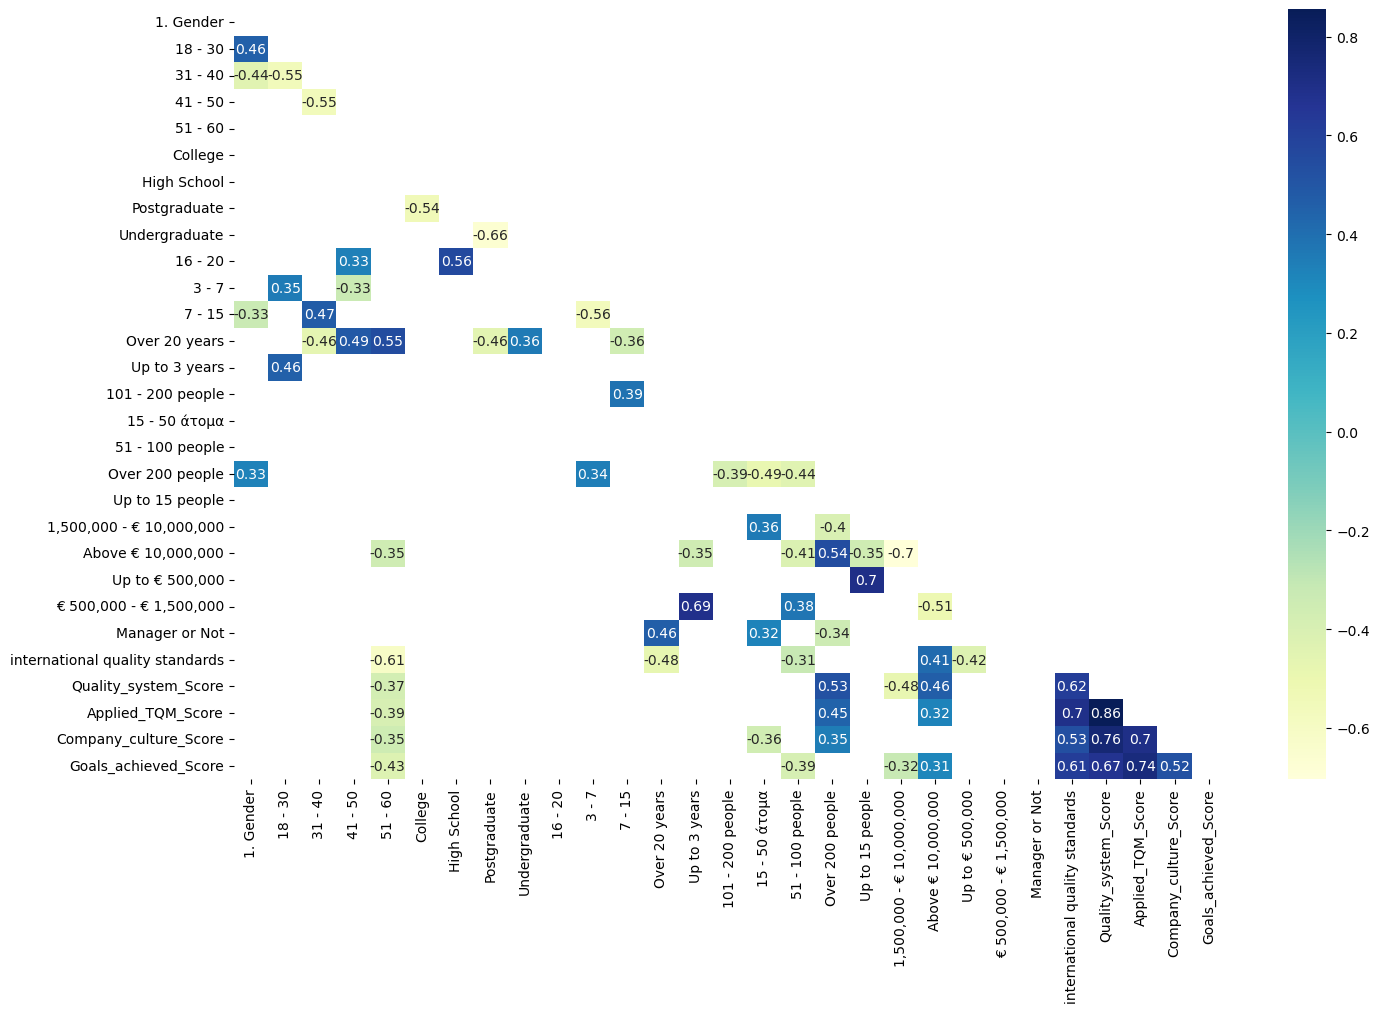

In [34]:
pvalues_2 = calculate_pvalues(post_df)

correlation_table_2 = post_df.corr(method='pearson')

important_correlation_table_2 = correlation_table_2

important_pvalues_2 = value_to_NaN(pvalues_2, 0.05, ">")

for col in correlation_table_2.columns:
    for index in correlation_table_2.index:
        if important_pvalues_2.loc[col, index] == "NaN":
            important_correlation_table_2.loc[col, index] = "NaN"
            
plt.figure(figsize=(16, 10))

important_correlation_table_2 = important_correlation_table_2.astype(float)

mask = np.triu(np.ones_like(important_correlation_table_2))

dataplot = sns.heatmap(important_correlation_table_2, cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()